### My 2025 stats so far as sampled from Strava API

This is the result of exploring my Strava data for 2025 using `https://www.strava.com/api/v3/athlete/activities` endpoint. The data was merged from multiple pages into a single CSV file for analysis.

In [ ]:
import pandas as pd

data = pd.read_csv('../data/merged.csv')

data.columns.tolist()

['resource_state',
 'athlete_id',
 'athlete_resource_state',
 'name',
 'distance',
 'moving_time',
 'elapsed_time',
 'total_elevation_gain',
 'type',
 'sport_type',
 'workout_type',
 'device_name',
 'id',
 'start_date',
 'start_date_local',
 'timezone',
 'utc_offset',
 'location_city',
 'location_state',
 'location_country',
 'achievement_count',
 'kudos_count',
 'comment_count',
 'athlete_count',
 'photo_count',
 'map_id',
 'map_summary_polyline',
 'map_resource_state',
 'trainer',
 'commute',
 'manual',
 'private',
 'visibility',
 'flagged',
 'gear_id',
 'average_speed',
 'max_speed',
 'average_temp',
 'has_heartrate',
 'heartrate_opt_out',
 'display_hide_heartrate_option',
 'elev_high',
 'elev_low',
 'upload_id',
 'upload_id_str',
 'external_id',
 'from_accepted_tag',
 'pr_count',
 'total_photo_count',
 'has_kudoed',
 'average_cadence',
 'start_latlng_0',
 'start_latlng_1',
 'end_latlng_0',
 'end_latlng_1',
 'source_file',
 'average_watts',
 'max_watts',
 'weighted_average_watts',
 

### Highest kudos on activity

In [8]:
data[['name', 'kudos_count']].sort_values(by='kudos_count', ascending=False).head(1)

,name,kudos_count
169,Utg 77km,13


### Activity type counts

In [9]:
data["sport_type"].value_counts()

sport_type
Run                 136
WeightTraining       82
Walk                 71
Ride                 53
TrailRun             28
Workout              12
Hike                  5
Swim                  3
Elliptical            3
TableTennis           1
MountainBikeRide      1
Name: count, dtype: int64

### Elevation gain over time - Trail Run

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


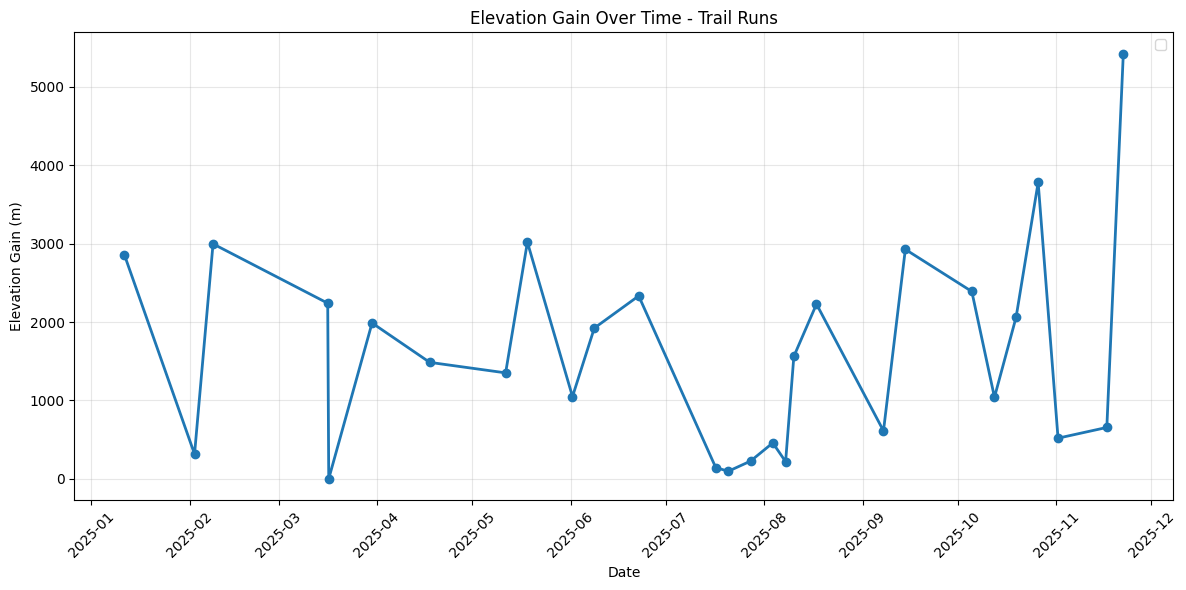

In [16]:
import matplotlib.pyplot as plt

# Filter for Trail Run and Run activities
trail_runs = data[data['sport_type'] == 'TrailRun'].copy()

# Convert start_date to datetime for both runs and trail runs
trail_runs['start_date'] = pd.to_datetime(trail_runs['start_date'])

# Sort by date
trail_runs = trail_runs.sort_values('start_date')

# Plot elevation gain over time
plt.figure(figsize=(12, 6))
plt.plot(trail_runs['start_date'], trail_runs['total_elevation_gain'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Elevation Gain (m)')
plt.title('Elevation Gain Over Time - Trail Runs')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend()
plt.show()

### Weight trainings over 2025

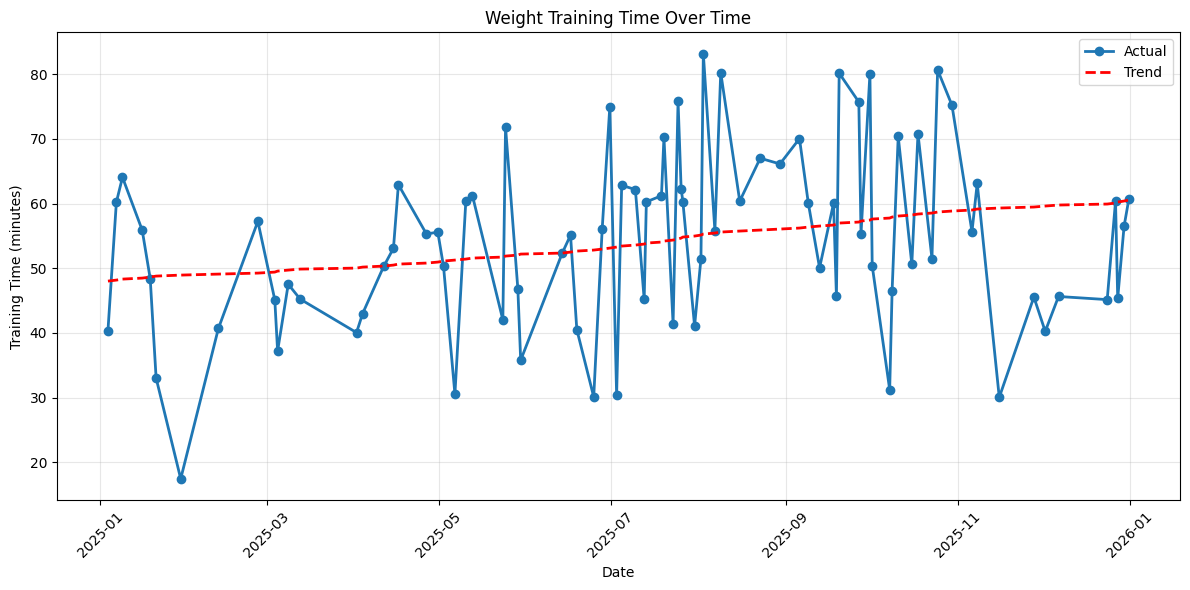

In [18]:
import numpy as np

# Filter for WeightTraining activities
weight_training = data[data['sport_type'] == 'WeightTraining'].copy()

# Convert start_date to datetime
weight_training['start_date'] = pd.to_datetime(weight_training['start_date'])

# Sort by date
weight_training = weight_training.sort_values('start_date')

# Convert moving_time from seconds to minutes
weight_training['moving_time_minutes'] = weight_training['moving_time'] / 60

# Calculate trend line
x_numeric = np.arange(len(weight_training))
z = np.polyfit(x_numeric, weight_training['moving_time_minutes'], 1)
p = np.poly1d(z)

# Plot moving time over time
plt.figure(figsize=(12, 6))
plt.plot(weight_training['start_date'], weight_training['moving_time_minutes'], marker='o', linestyle='-', linewidth=2, label='Actual')
plt.plot(weight_training['start_date'], p(x_numeric), "r--", linewidth=2, label='Trend')
plt.xlabel('Date')
plt.ylabel('Training Time (minutes)')
plt.title('Weight Training Time Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
